# Week 13

## ipython-sql

In [ ]:
%pip install ipython-sql

In [1]:
%load_ext sql

## SQL Basics

Connect to a database

In [2]:
%%sql
sqlite:///tiny.sqlite

In [3]:
%%sql
SELECT * 
FROM sqlite_master;

 * sqlite:///tiny.sqlite
Done.


type,name,tbl_name,rootpage,sql


In [4]:
%%sql
CREATE TABLE courses (
    course_id TEXT NOT NULL PRIMARY KEY,
    course_name TEXT, 
    credits INT );

 * sqlite:///tiny.sqlite
Done.


[]

In [5]:
%%sql
SELECT * 
FROM sqlite_master;

 * sqlite:///tiny.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,courses,courses,2,"CREATE TABLE courses ( course_id TEXT NOT NULL PRIMARY KEY, course_name TEXT, credits INT )"
index,sqlite_autoindex_courses_1,courses,3,None


In [19]:
%%sql
SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
Done.


course_id,course_name,credits


In [20]:
%%sql 
INSERT INTO courses (course_id, course_name, credits)
VALUES ('MTH 141', 'Calculus I', 4);

 * sqlite:///tiny.sqlite
1 rows affected.


[]

In [21]:
%%sql
SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
Done.


course_id,course_name,credits
MTH 141,Calculus I,4


In [22]:
%%sql 
INSERT INTO courses (course_id, course_name)
VALUES ('MTH 309', 'Linear Algebra');

SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
1 rows affected.
Done.


course_id,course_name,credits
MTH 141,Calculus I,4
MTH 309,Linear Algebra,None


In [23]:
%%sql 
INSERT INTO courses (course_id, course_name)
VALUES ('MTH 309', 'Linear Algebra');

SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite


IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: courses.course_id
[SQL: INSERT INTO courses (course_id, course_name)
VALUES ('MTH 309', 'Linear Algebra');]
(Background on this error at: http://sqlalche.me/e/13/gkpj)

In [24]:
%%sql 
INSERT INTO courses (course_id, course_name, credits)
VALUES 
   ('MTH 142', 'Calculus II', 4),
   ('MTH 448', 'Data Oriented Computing', 4),
   ('MTH 462', 'Topics in Analysis', 2);

SELECT *
FROM courses;

 * sqlite:///tiny.sqlite
3 rows affected.
Done.


course_id,course_name,credits
MTH 141,Calculus I,4
MTH 309,Linear Algebra,None
MTH 142,Calculus II,4
MTH 448,Data Oriented Computing,4
MTH 462,Topics in Analysis,2


In [26]:
%%sql
UPDATE courses
SET credits=4
WHERE course_id='MTH 309';

SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
1 rows affected.
Done.


course_id,course_name,credits
MTH 141,Calculus I,4
MTH 309,Linear Algebra,4
MTH 142,Calculus II,4
MTH 448,Data Oriented Computing,4
MTH 462,Topics in Analysis,2


In [27]:
%%sql
DELETE FROM courses
WHERE credits < 4;

SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
1 rows affected.
Done.


course_id,course_name,credits
MTH 141,Calculus I,4
MTH 309,Linear Algebra,4
MTH 142,Calculus II,4
MTH 448,Data Oriented Computing,4


In [28]:
%%sql 
ALTER TABLE courses
ADD COLUMN semester;

SELECT * 
FROM courses;

 * sqlite:///tiny.sqlite
Done.
Done.


course_id,course_name,credits,semester
MTH 141,Calculus I,4,None
MTH 309,Linear Algebra,4,None
MTH 142,Calculus II,4,None
MTH 448,Data Oriented Computing,4,None


In [29]:
%%sql
UPDATE courses
SET semester = 'Fall'; 

SELECT * 
FROM courses

 * sqlite:///tiny.sqlite
4 rows affected.
Done.


course_id,course_name,credits,semester
MTH 141,Calculus I,4,Fall
MTH 309,Linear Algebra,4,Fall
MTH 142,Calculus II,4,Fall
MTH 448,Data Oriented Computing,4,Fall


In [30]:
%%sql
DROP TABLE courses;

 * sqlite:///tiny.sqlite
Done.


[]

In [31]:
%%sql 
SELECT * 
FROM sqlite_master;

 * sqlite:///tiny.sqlite
Done.


type,name,tbl_name,rootpage,sql


In [32]:
%%sql
DROP TABLE courses;

 * sqlite:///tiny.sqlite
(sqlite3.OperationalError) no such table: courses
[SQL: DROP TABLE courses;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [33]:
%%sql
DROP TABLE IF EXISTS courses;

 * sqlite:///tiny.sqlite
Done.


[]

## Queries

In [3]:
%%sql
sqlite:///gradebook_data.sqlite

In [4]:
%%sql
SELECT * 
FROM sqlite_master;

 * sqlite:///gradebook_data.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,gradebook,gradebook,4,"CREATE TABLE ""gradebook"" ( student_id INTEGER PRIMARY KEY, first_name TEXT, last_name TEXT, major TEXT, exam1 INTEGER, exam2 INTEGER, exam3 INTEGER)"


In [5]:
%%sql
SELECT * 
FROM gradebook

 * sqlite:///gradebook_data.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
2712,Starr,Bachand,computer science,None,27,85
3548,Marcia,Hinkel,biology,79,10,41
3877,Chu,Flax,mathematics,72,None,29
5108,Shawnna,Coate,computer science,79,96,61
5775,Rosina,Hovey,biology,96,13,99
5787,Tenisha,Rippel,computer science,27,54,79
6245,Adelina,Brummitt,mathematics,None,67,99
7138,Fran,Mount,biology,71,5,80
7256,Rosalinda,Trippe,computer science,None,None,82
8911,Lottie,Champine,computer science,None,None,62


In [37]:
%%sql 
SELECT first_name, last_name, exam3
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam3
Starr,Bachand,85
Marcia,Hinkel,41
Chu,Flax,29
Shawnna,Coate,61
Rosina,Hovey,99
Tenisha,Rippel,79
Adelina,Brummitt,99
Fran,Mount,80
Rosalinda,Trippe,82
Lottie,Champine,62


In [39]:
%%sql 
SELECT first_name FName, last_name LName, exam3 AS LastExam
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


FName,LName,LastExam
Starr,Bachand,85
Marcia,Hinkel,41
Chu,Flax,29
Shawnna,Coate,61
Rosina,Hovey,99
Tenisha,Rippel,79
Adelina,Brummitt,99
Fran,Mount,80
Rosalinda,Trippe,82
Lottie,Champine,62


In [42]:
%%sql
SELECT first_name, last_name, exam1 + exam2 + exam3 AS exam_total
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam_total
Starr,Bachand,None
Marcia,Hinkel,130
Chu,Flax,None
Shawnna,Coate,236
Rosina,Hovey,208
Tenisha,Rippel,160
Adelina,Brummitt,None
Fran,Mount,156
Rosalinda,Trippe,None
Lottie,Champine,None


In [44]:
%%sql
SELECT first_name, last_name, exam1, COALESCE(exam1, 0) AS exam1_modified
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam1,exam1_modified
Starr,Bachand,None,0
Marcia,Hinkel,79,79
Chu,Flax,72,72
Shawnna,Coate,79,79
Rosina,Hovey,96,96
Tenisha,Rippel,27,27
Adelina,Brummitt,None,0
Fran,Mount,71,71
Rosalinda,Trippe,None,0
Lottie,Champine,None,0


In [45]:
%%sql
SELECT first_name, last_name, COALESCE(exam1, 0) + COALESCE(exam2, 0) + COALESCE(exam3, 0) AS exam_total
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam_total
Starr,Bachand,112
Marcia,Hinkel,130
Chu,Flax,101
Shawnna,Coate,236
Rosina,Hovey,208
Tenisha,Rippel,160
Adelina,Brummitt,166
Fran,Mount,156
Rosalinda,Trippe,82
Lottie,Champine,62


In [47]:
%%sql
SELECT last_name || ", " || first_name AS Name, exam1, exam2, exam3
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


Name,exam1,exam2,exam3
"Bachand, Starr",None,27,85
"Hinkel, Marcia",79,10,41
"Flax, Chu",72,None,29
"Coate, Shawnna",79,96,61
"Hovey, Rosina",96,13,99
"Rippel, Tenisha",27,54,79
"Brummitt, Adelina",None,67,99
"Mount, Fran",71,5,80
"Trippe, Rosalinda",None,None,82
"Champine, Lottie",None,None,62


In [49]:
%%sql
SELECT first_name, last_name, exam3,
CASE 
    WHEN exam3 > 90 THEN 'A'
    WHEN exam3 > 80 THEN 'B'
    WHEN exam3 > 70 THEN 'C'
    WHEN exam3 > 60 THEN 'D'
    ELSE 'F'
END AS letter_grade
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam3,letter_grade
Starr,Bachand,85,B
Marcia,Hinkel,41,F
Chu,Flax,29,F
Shawnna,Coate,61,D
Rosina,Hovey,99,A
Tenisha,Rippel,79,C
Adelina,Brummitt,99,A
Fran,Mount,80,C
Rosalinda,Trippe,82,B
Lottie,Champine,62,D


### WHERE

In [54]:
%%sql
SELECT * 
FROM gradebook
WHERE exam1 > 70 AND NOT exam3 > 70;

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
3548,Marcia,Hinkel,biology,79,10,41
3877,Chu,Flax,mathematics,72,None,29
5108,Shawnna,Coate,computer science,79,96,61


In [55]:
%%sql 
SELECT * 
FROM gradebook
WHERE exam1 = NULL

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3


In [56]:
%%sql 
SELECT * 
FROM gradebook
WHERE exam1 IS NULL

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
2712,Starr,Bachand,computer science,None,27,85
6245,Adelina,Brummitt,mathematics,None,67,99
7256,Rosalinda,Trippe,computer science,None,None,82
8911,Lottie,Champine,computer science,None,None,62


In [57]:
%%sql 
SELECT * 
FROM gradebook
WHERE exam1 IS NOT NULL

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
3548,Marcia,Hinkel,biology,79,10,41
3877,Chu,Flax,mathematics,72,None,29
5108,Shawnna,Coate,computer science,79,96,61
5775,Rosina,Hovey,biology,96,13,99
5787,Tenisha,Rippel,computer science,27,54,79
7138,Fran,Mount,biology,71,5,80
9165,Ludivina,Hoskin,mathematics,27,55,None
9346,Stanton,Mcgaugh,computer science,6,60,40
9667,Jonnie,Hillock,mathematics,56,24,72


In [59]:
%%sql
SELECT * 
FROM gradebook
WHERE last_name LIKE 'H%e%'

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
3548,Marcia,Hinkel,biology,79,10,41
5775,Rosina,Hovey,biology,96,13,99


## ORDER BY

In [60]:
%%sql
SELECT first_name, last_name, exam3
FROM gradebook
ORDER BY exam3

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam3
Ludivina,Hoskin,None
Chu,Flax,29
Stanton,Mcgaugh,40
Marcia,Hinkel,41
Shawnna,Coate,61
Lottie,Champine,62
Jonnie,Hillock,72
Tenisha,Rippel,79
Fran,Mount,80
Rosalinda,Trippe,82


In [62]:
%%sql
SELECT first_name, last_name, exam3
FROM gradebook
ORDER BY exam3 DESC

 * sqlite:///gradebook_data.sqlite
   sqlite:///tiny.sqlite
Done.


first_name,last_name,exam3
Rosina,Hovey,99
Adelina,Brummitt,99
Starr,Bachand,85
Rosalinda,Trippe,82
Fran,Mount,80
Tenisha,Rippel,79
Jonnie,Hillock,72
Lottie,Champine,62
Shawnna,Coate,61
Marcia,Hinkel,41


## LIMIT

In [5]:
%%sql 
SELECT first_name, last_name, exam3
FROM gradebook
ORDER BY exam3 DESC
LIMIT 5 OFFSET 2

 * sqlite:///gradebook_data.sqlite
Done.


first_name,last_name,exam3
Starr,Bachand,85
Rosalinda,Trippe,82
Fran,Mount,80
Tenisha,Rippel,79
Jonnie,Hillock,72


## Sidenote: word clouds

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
review = """
This film is absolutely awful, but nevertheless, it can be hilarious at times,
although this humor is entirely unintentional.The plot was beyond ridiculous.
I don't even think a 2 year-old would be convinced by the ludicrous idiocy that
the film-makers tried to slap together into a story. However, on the positive
side, some of the horrifically inane plot twists provide a great deal of humor.
For example, "Wow, Lady Hogbottom has a giant missile hidden in her back yard!"
It gets worse (and even funnier), but I'll spare you.The acting is generally
laughable. Most of the kids' roles are sort of cute, but not very believable.
On the other hand, Annie is pretty awful all-around. The adults don't take their
roles seriously at all, but this is largely a good thing. If they'd tried to be
believable, the film would've been even worse. Which is difficult to imagine.
Once you get past the overall crappiness of the movie, there are actually a few
standout moments of almost-not-crappiness. The scene where Lady Hogbottom's son
runs away with the maid is surprisingly hilarious, though it's an annoying letdown
when they get caught by the police. The butler character, while very minor, is a ray
of sunlight that almost, but never quite pierces through the gloom.Watching this
movie actually caused me physical pain. Nevertheless, there were a few redeeming
parts that made it almost watchable without beginning to hemorrhage internally.
Judged on its good parts alone, the movie would be about a 5; unfortunately,
the rest of the movie hardly deserves a 1. Thus, I give it a 3. That's being pretty
generous, I'd say.
"""

In [3]:
import re
from collections import Counter

words = re.findall(r"[a-z']+", review.lower())
words

['this',
 'film',
 'is',
 'absolutely',
 'awful',
 'but',
 'nevertheless',
 'it',
 'can',
 'be',
 'hilarious',
 'at',
 'times',
 'although',
 'this',
 'humor',
 'is',
 'entirely',
 'unintentional',
 'the',
 'plot',
 'was',
 'beyond',
 'ridiculous',
 'i',
 "don't",
 'even',
 'think',
 'a',
 'year',
 'old',
 'would',
 'be',
 'convinced',
 'by',
 'the',
 'ludicrous',
 'idiocy',
 'that',
 'the',
 'film',
 'makers',
 'tried',
 'to',
 'slap',
 'together',
 'into',
 'a',
 'story',
 'however',
 'on',
 'the',
 'positive',
 'side',
 'some',
 'of',
 'the',
 'horrifically',
 'inane',
 'plot',
 'twists',
 'provide',
 'a',
 'great',
 'deal',
 'of',
 'humor',
 'for',
 'example',
 'wow',
 'lady',
 'hogbottom',
 'has',
 'a',
 'giant',
 'missile',
 'hidden',
 'in',
 'her',
 'back',
 'yard',
 'it',
 'gets',
 'worse',
 'and',
 'even',
 'funnier',
 'but',
 "i'll",
 'spare',
 'you',
 'the',
 'acting',
 'is',
 'generally',
 'laughable',
 'most',
 'of',
 'the',
 "kids'",
 'roles',
 'are',
 'sort',
 'of',
 'cu

In [4]:
counts = Counter(words)

In [6]:
counts.most_common(10)

[('the', 20),
 ('a', 11),
 ('is', 8),
 ('of', 8),
 ('but', 5),
 ('this', 4),
 ('it', 4),
 ('be', 4),
 ('to', 4),
 ('movie', 4)]

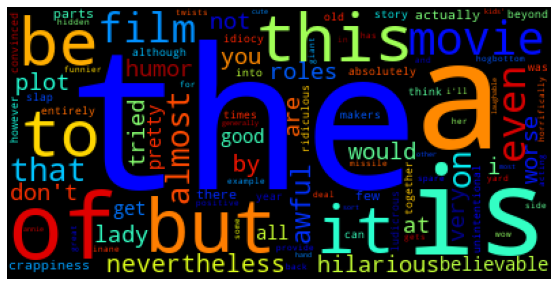

In [14]:
from wordcloud import WordCloud

wc = WordCloud(max_words=100, background_color="black", colormap="jet")
wc.generate_from_frequencies(counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()

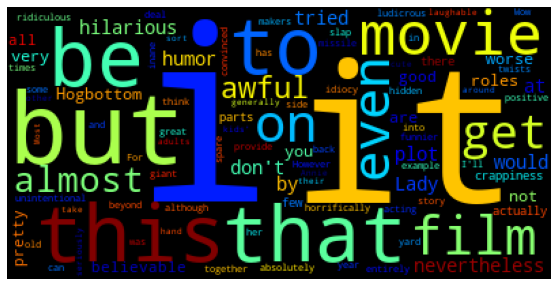

In [19]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=['the', 'a', 'of'], max_words=100, background_color="black", colormap="jet")
wc.generate_from_text(review)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [22]:
WordCloud?

## Back to SQL

In [1]:
%load_ext sql

In [2]:
%%sql
sqlite:///gradebook_data.sqlite

In [3]:
%%sql
DROP TABLE IF EXISTS test

 * sqlite:///gradebook_data.sqlite
Done.


[]

In [27]:
import sqlalchemy
sqlalchemy.__version__

'1.3.24'

In [28]:
%pip install "sqlalchemy<1.4"

Note: you may need to restart the kernel to use updated packages.


In [4]:
%%sql
SELECT * 
FROM gradebook

 * sqlite:///gradebook_data.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
2712,Starr,Bachand,computer science,None,27,85
3548,Marcia,Hinkel,biology,79,10,41
3877,Chu,Flax,mathematics,72,None,29
5108,Shawnna,Coate,computer science,79,96,61
5775,Rosina,Hovey,biology,96,13,99
5787,Tenisha,Rippel,computer science,27,54,79
6245,Adelina,Brummitt,mathematics,None,67,99
7138,Fran,Mount,biology,71,5,80
7256,Rosalinda,Trippe,computer science,None,None,82
8911,Lottie,Champine,computer science,None,None,62


## Aggregations

In [7]:
%%sql
SELECT COUNT(exam1), COUNT(exam2), COUNT(exam3), COUNT(*)
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


COUNT(exam1),COUNT(exam2),COUNT(exam3),COUNT(*)
9,10,12,13


In [8]:
%%sql
SELECT COUNT( DISTINCT exam1), COUNT(DISTINCT exam2), COUNT(DISTINCT exam3), COUNT(*)
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


COUNT( DISTINCT exam1),COUNT(DISTINCT exam2),COUNT(DISTINCT exam3),COUNT(*)
7,10,11,13


In [10]:
%%sql
SELECT AVG(exam1) AS ex_1_avg, AVG(exam2), AVG(exam3)
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


ex_1_avg,AVG(exam2),AVG(exam3)
57.0,41.1,69.08333333333333


In [11]:
%%sql
SELECT ROUND(AVG(exam1), 2), ROUND(AVG(exam2), 2), ROUND(AVG(exam3), 2)
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


"ROUND(AVG(exam1), 2)","ROUND(AVG(exam2), 2)","ROUND(AVG(exam3), 2)"
57.0,41.1,69.08


In [14]:
%%sql
SELECT MAX(exam1), MIN(exam2), SUM(exam3)
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


MAX(exam1),MIN(exam2),SUM(exam3)
96,5,829


## GROUP BY

In [16]:
%%sql
SELECT * 
FROM gradebook;

 * sqlite:///gradebook_data.sqlite
Done.


student_id,first_name,last_name,major,exam1,exam2,exam3
2712,Starr,Bachand,computer science,None,27,85
3548,Marcia,Hinkel,biology,79,10,41
3877,Chu,Flax,mathematics,72,None,29
5108,Shawnna,Coate,computer science,79,96,61
5775,Rosina,Hovey,biology,96,13,99
5787,Tenisha,Rippel,computer science,27,54,79
6245,Adelina,Brummitt,mathematics,None,67,99
7138,Fran,Mount,biology,71,5,80
7256,Rosalinda,Trippe,computer science,None,None,82
8911,Lottie,Champine,computer science,None,None,62


In [19]:
%%sql
SELECT major, ROUND(AVG(exam1), 2), ROUND(AVG(exam2), 2), ROUND(AVG(exam3), 2)
FROM gradebook
GROUP BY major;

 * sqlite:///gradebook_data.sqlite
Done.


major,"ROUND(AVG(exam1), 2)","ROUND(AVG(exam2), 2)","ROUND(AVG(exam3), 2)"
biology,82.0,9.33,73.33
computer science,37.33,59.25,68.17
mathematics,51.67,48.67,66.67


In [20]:
%%sql 
SELECT major, GROUP_CONCAT(exam1, ", ")
FROM gradebook
GROUP BY major;

 * sqlite:///gradebook_data.sqlite
Done.


major,"GROUP_CONCAT(exam1, "", "")"
biology,"79, 96, 71"
computer science,"79, 27, 6"
mathematics,"72, 27, 56"


In [22]:
%%sql
SELECT major, ROUND(AVG(exam1), 2) AS exam1_avg
FROM gradebook
GROUP BY major
HAVING exam1_avg > 50

 * sqlite:///gradebook_data.sqlite
Done.


major,exam1_avg
biology,82.0
mathematics,51.67


## Working with multiple tables

In [23]:
%%sql
sqlite:///courses_data.sqlite

In [24]:
%%sql
SELECT * 
FROM sqlite_master;

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,students,students,2,"CREATE TABLE students ( student_id INTEGER, first_name TEXT, last_name TEXT, major TEXT)"
table,mth141,mth141,3,"CREATE TABLE mth141 ( student_id INTEGER, grade TEXT)"
table,eng101,eng101,4,"CREATE TABLE eng101 ( student_id INTEGER, grade TEXT)"


In [25]:
%%sql
SELECT * 
FROM students

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,first_name,last_name,major
196,Rosina,Hovey,biology
165,Stanton,Mcgaugh,biology
123,Jonnie,Hillock,mathematics
136,Chu,Flax,mathematics
122,Rosalinda,Trippe,biology
190,Fran,Mount,computer science
109,Shawnna,Coate,mathematics
189,Marcia,Hinkel,mathematics
101,Starr,Bachand,mathematics
124,Lottie,Champine,computer science


In [26]:
%%sql 
SELECT *
FROM mth141

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,grade
122,A
109,C
127,A
140,F
145,C
157,F
188,C


In [27]:
%%sql 
SELECT *
FROM eng101

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,grade
165,F
123,C
122,A
189,A
140,D
188,A


## INTERSECT

In [28]:
%%sql
SELECT student_id
FROM mth141
INTERSECT
SELECT student_id
FROM eng101

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id
122
140
188


## UNION

In [29]:
%%sql
SELECT student_id
FROM mth141
UNION
SELECT student_id
FROM eng101

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id
109
122
123
127
140
145
157
165
188
189


## EXCEPT

In [30]:
%%sql
SELECT student_id
FROM mth141
EXCEPT
SELECT student_id
FROM eng101

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id
109
127
145
157


## INNER JOIN

In [31]:
%%sql 
SELECT *
FROM 
    mth141 INNER JOIN eng101
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,grade,student_id_1,grade_1
122,A,122,A
140,F,140,D
188,C,188,A


In [33]:
%%sql 
SELECT
    mth141.student_id,
    mth141.grade AS mth141,
    eng101.grade AS eng101
FROM 
    mth141 INNER JOIN eng101
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,mth141,eng101
122,A,A
140,F,D
188,C,A


In [34]:
%%sql 
SELECT
    mth141.student_id,
    mth141.grade AS mth141,
    eng101.grade AS eng101
FROM 
    mth141 INNER JOIN eng101
    ON mth141.student_id = eng101.student_id AND mth141.grade  != eng101.grade

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,mth141,eng101
140,F,D
188,C,A


## LEFT JOIN

In [35]:
%%sql 
SELECT *
FROM 
    mth141 LEFT JOIN eng101
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,grade,student_id_1,grade_1
122,A,122,A
109,C,None,None
127,A,None,None
140,F,140,D
145,C,None,None
157,F,None,None
188,C,188,A


In [37]:
%%sql 
SELECT
    mth141.student_id,
    mth141.grade AS mth141,
    eng101.grade AS eng101
FROM 
    mth141 LEFT JOIN eng101
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,mth141,eng101
122,A,A
109,C,None
127,A,None
140,F,D
145,C,None
157,F,None
188,C,A


## Simulating RIGHT JOIN

In [38]:
%%sql 
SELECT *
FROM 
    eng101 LEFT JOIN mth141
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,grade,student_id_1,grade_1
165,F,None,None
123,C,None,None
122,A,122,A
189,A,None,None
140,D,140,F
188,A,188,C


In [39]:
%%sql 
SELECT
    eng101.student_id,
    mth141.grade AS mth141,
    eng101.grade AS eng101
FROM 
    eng101 LEFT JOIN mth141
    ON mth141.student_id = eng101.student_id

 * sqlite:///courses_data.sqlite
   sqlite:///gradebook_data.sqlite
Done.


student_id,mth141,eng101
165,None,F
123,None,C
122,A,A
189,None,A
140,F,D
188,C,A
